In [1]:
# !pip install interpret
# !pip install --user xgboost
# !pip install pytorch-tabnet
# !pip install anchor-exp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from interpret import preserve, show
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

random_state=42

In [3]:
dataset_folder = 'dataset/ESDRPD/'

file = 'Dataset 2 _ Early-stage diabetes risk prediction dataset (ESDRPD).xlsx'
class_names = [0, 1]
_class = 'Class'

In [4]:
df = pd.read_excel(open(dataset_folder + file, 'rb'), sheet_name='Dataset 2 – Early-stage diabete')
 
df.replace(('Yes', 'No'), (1, 0), inplace=True)
df.replace(('Positive', 'Negative'), (1, 0), inplace=True)
df.replace(('Male', 'Female'), (1, 0), inplace=True)
df.head()

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity,Class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   Sudden weight loss  520 non-null    int64
 5   Weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   Visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  Delayed healing     520 non-null    int64
 12  Partial paresis     520 non-null    int64
 13  Muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  Class               520 non-null    int64
dt

In [6]:
X, y = df.drop(columns=[_class]), df[_class]

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=random_state)

In [8]:
x_test.shape

(156, 16)

In [9]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 225 to 102
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 364 non-null    int64
 1   Gender              364 non-null    int64
 2   Polyuria            364 non-null    int64
 3   Polydipsia          364 non-null    int64
 4   Sudden weight loss  364 non-null    int64
 5   Weakness            364 non-null    int64
 6   Polyphagia          364 non-null    int64
 7   Genital thrush      364 non-null    int64
 8   Visual blurring     364 non-null    int64
 9   Itching             364 non-null    int64
 10  Irritability        364 non-null    int64
 11  Delayed healing     364 non-null    int64
 12  Partial paresis     364 non-null    int64
 13  Muscle stiffness    364 non-null    int64
 14  Alopecia            364 non-null    int64
 15  Obesity             364 non-null    int64
dtypes: int64(16)
memory usage: 48.3 KB


# ML Model

In [10]:
import sklearn.metrics
import pandas as pd
import time
import numpy as np

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from interpret.glassbox import ExplainableBoostingClassifier
from pytorch_tabnet.tab_model import TabNetClassifier

In [12]:
random_state=42

In [13]:
x_train

,Age,Gender,Polyuria,Polydipsia,Sudden weight loss,Weakness,Polyphagia,Genital thrush,Visual blurring,Itching,Irritability,Delayed healing,Partial paresis,Muscle stiffness,Alopecia,Obesity
225,29,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
94,36,0,1,1,0,1,1,0,1,1,0,1,1,0,0,0
462,57,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
284,72,1,1,0,0,0,1,0,1,1,0,1,1,1,1,0
23,48,1,0,1,1,1,0,0,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,35,0,0,1,1,1,0,0,0,1,0,1,1,1,0,0
106,58,1,0,1,1,1,1,0,1,1,0,0,1,0,1,1
270,40,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0
435,57,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0


In [14]:
def classify_report(clfs, dataset):
    x_train, y_train, x_test, y_test = dataset
    data = []
    for clf, name, no_df in clfs:
        if no_df:
            x_tr, x_te = x_train, x_test
        else:
            x_tr, x_te = x_train.values,  x_test.values
        clf.fit(x_tr, y_train)
        pred = clf.predict(x_te)
        f1, acc = sklearn.metrics.f1_score(y_test, pred, average='binary'), sklearn.metrics.accuracy_score(y_test, pred)
        data.append([name, f1, acc])
    df = pd.DataFrame(data, columns = ['Name', 'F1', 'Acc.'])
    df = df.sort_values(by=['F1'])
    return df

In [15]:
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=random_state)
gbc = GradientBoostingClassifier(random_state=random_state)
_xgb = xgb.XGBClassifier(random_state=random_state)
ebm = ExplainableBoostingClassifier(random_state=random_state)
tbn = TabNetClassifier(verbose=0, seed=random_state)

clfs = [(rf, 'rf', True), (gbc, 'gbc', True), (_xgb, 'xgb', True), (ebm, 'ebm', True), (tbn, 'tbn', False)]
# clfs = [(rf, 'rf', True), (ebm, 'ebm', True), (tbn, 'tbn', False)]
dataset = x_train, y_train, x_test, y_test
classify_report(clfs, dataset)

,Name,F1,Acc.
4,tbn,0.175439,0.397436
3,ebm,0.980392,0.974359
2,xgb,0.985075,0.980769
1,gbc,0.990099,0.987179
0,rf,0.995074,0.993590


# RF Importance

In [16]:
selected_model = rf

class_names = ['NO','YES']
feature_names = x_train.columns.to_list()

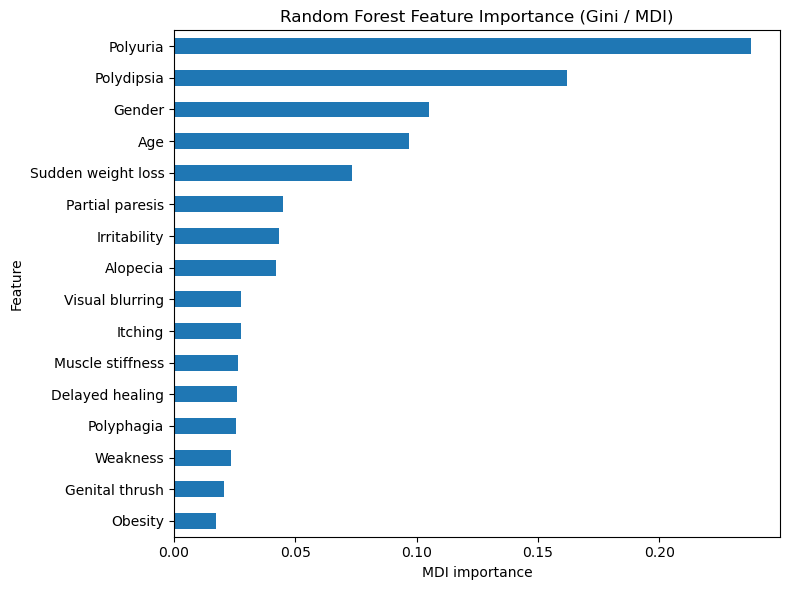

In [17]:
# If selected_model is a Pipeline, grab its final estimator for feature_importances_
final_est = getattr(selected_model, "steps", None)
final_est = final_est[-1][1] if final_est else selected_model

if not hasattr(final_est, "feature_importances_"):
    raise ValueError("Current estimator does not expose .feature_importances_ (MDI).")

gini_series = pd.Series(final_est.feature_importances_, index=feature_names)
gini_series = gini_series.sort_values(ascending=True)

ax = gini_series.plot.barh(figsize=(8, 6))
ax.set_title("Random Forest Feature Importance (Gini / MDI)")
ax.set_xlabel("MDI importance")
ax.set_ylabel("Feature")
plt.tight_layout()
# plt.savefig("figs_global_importance/focal_model_gini_importance.png", dpi=300)
plt.show()


Elapsed time to compute the importances: 0.446 seconds


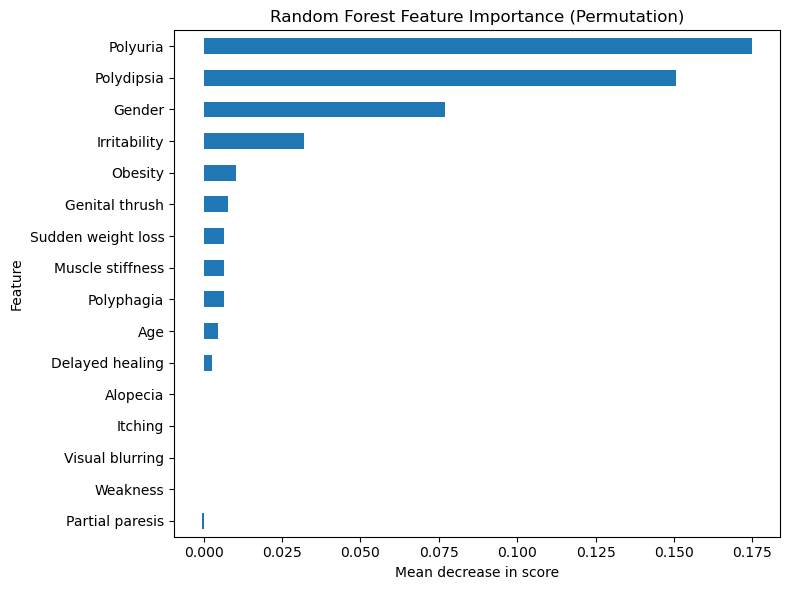

In [18]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    selected_model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

selected_model_importances = pd.Series(
    result.importances_mean, index=feature_names
).sort_values(ascending=True)

ax = selected_model_importances.plot.barh(figsize=(8, 6))
ax.set_title("Random Forest Feature Importance (Permutation)")
ax.set_xlabel("Mean decrease in score")
ax.set_ylabel("Feature")
plt.tight_layout()
# plt.savefig("figs_global_importance/focal_model_permutation_importance.png", dpi=300)
plt.show()